In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
X_tfidf = pd.read_csv('X_tfidf.csv')
split_data = pd.read_csv('split_data_with_sentiments.csv')

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_tfidf)
y = split_data['ttype']

In [4]:
# Визуальные данные
def scatterplot(x_data, y_data, x_label="", y_label="", title="Распределение данных", color="green"):
    _, ax = plt.subplots()

    ax.scatter(x_data, y_data, s=10, color=color)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

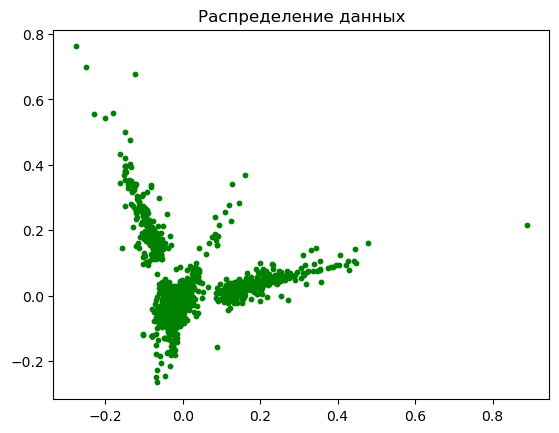

In [5]:
scatterplot(x_data=X[:,0],y_data=X[:,1])

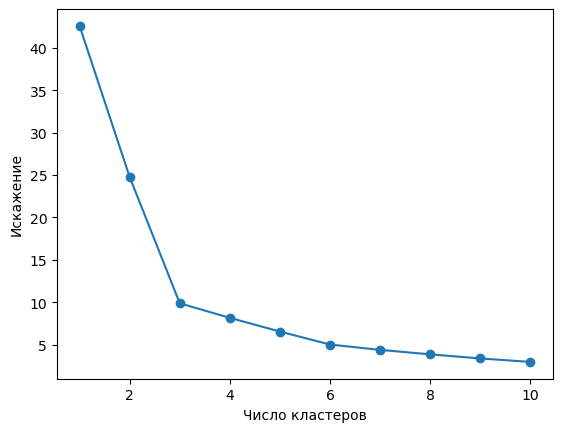

In [6]:
# Выбрать количество кластеров
from sklearn.cluster import KMeans

distortions = []
for i in range (1, 11):
  km = KMeans (n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel("Число кластеров")
plt.ylabel("Искажение")
plt.show()

In [7]:
from sklearn.cluster import KMeans
import time
start = time.time()
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print("Время выполнения:",time.time()-start)

Время выполнения: 0.05366015434265137


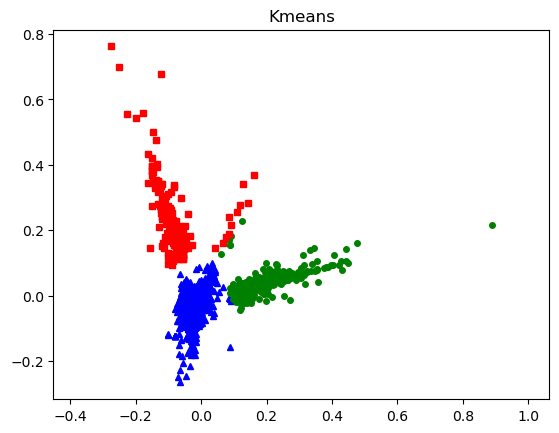

In [20]:
def cluster_display(X, label, title="Распределение данных"):
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = 1)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = 1)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = 1)

    plt.axis('equal')
    plt.title(title)
    plt.plot()
    plt.show()

cluster_display(X, kmeans.labels_,title='Kmeans')

In [9]:
def score(X, y_predict):
  print("rand:",metrics.rand_score(y, y_predict))
  print("adjust rand:",metrics.adjusted_rand_score(y, y_predict))
  print("nmi:",metrics.normalized_mutual_info_score(y,y_predict))
  print("ami:",metrics.adjusted_mutual_info_score(y, y_predict))
  print("однородность:",metrics.homogeneity_score(y, y_predict))
  print("полнота:",metrics.completeness_score(y, y_predict))
  print("V-мера:",metrics.v_measure_score(y, y_predict))
  print("Silhouette:",metrics.silhouette_score(X, y_predict))
  print("Calinski–Harabasz:",metrics.calinski_harabasz_score(X, y_predict))
  print("Davies–Bouldin:",metrics.davies_bouldin_score(X, y_predict))

In [10]:
score(X, kmeans.labels_)

rand: 0.500826808768604
adjust rand: 0.0017406499523421038
nmi: 0.010625299318364813
ami: 0.010293382105682779
однородность: 0.00917040897281547
полнота: 0.012628877579744567
V-мера: 0.010625299318364813
Silhouette: 0.8228342060949544
Calinski–Harabasz: 8278.930378022498
Davies–Bouldin: 0.42110028791825704


In [11]:
from sklearn.cluster import MiniBatchKMeans
start = time.time()
minibatch_k = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=128)
minibatch_k.fit(X)
print("Время выполнения:", time.time()-start)

C:\Users\nguye\anaconda3\envs\ML_lab\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Время выполнения: 0.3870570659637451


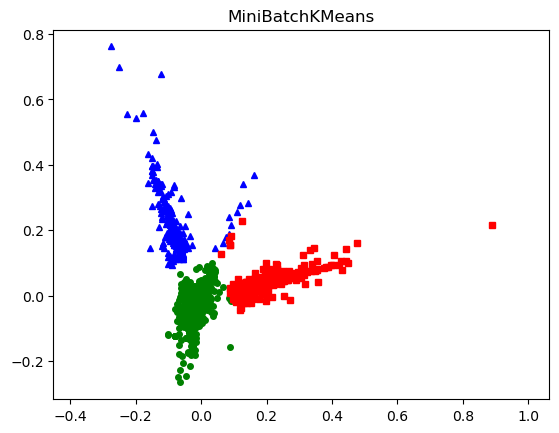

In [21]:
cluster_display(X,minibatch_k.labels_,title='MiniBatchKMeans')

In [13]:
score(X, minibatch_k.labels_)

rand: 0.500826808768604
adjust rand: 0.0017406499523421038
nmi: 0.010625299318364813
ami: 0.010293382105682779
однородность: 0.00917040897281547
полнота: 0.012628877579744568
V-мера: 0.010625299318364811
Silhouette: 0.8228342060949544
Calinski–Harabasz: 8278.930378022498
Davies–Bouldin: 0.42110028791825704


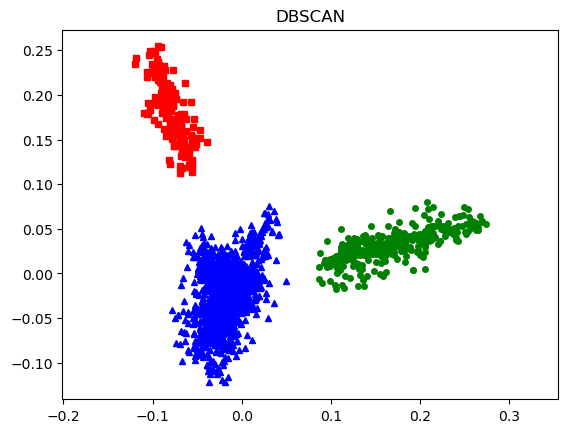

number of clusters:  3
number of noise 217


In [22]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.02,min_samples=30).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
cluster_display(X,db.labels_,title='DBSCAN')
print('number of clusters: ', n_clusters)
print('number of noise', n_noise)

In [15]:
score(X, db.labels_)

rand: 0.5006135242153825
adjust rand: 0.0013059766034964528
nmi: 0.007859709947143892
ami: 0.007394522224897415
однородность: 0.007286303860595498
полнота: 0.008531075082424388
V-мера: 0.007859709947143892
Silhouette: 0.787488476501038
Calinski–Harabasz: 1986.1695927898525
Davies–Bouldin: 1.953815259853185


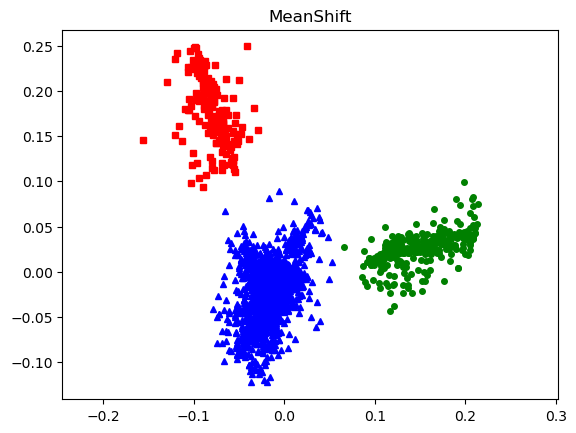

band_width: 0.04331337993417658


In [25]:
from sklearn.cluster import MeanShift, estimate_bandwidth
band_width = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=band_width)
ms.fit(X)
cluster_display(X,ms.labels_,title='MeanShift')
print('band_width:', band_width)

In [17]:
score(X, ms.labels_)

rand: 0.5005413590616956
adjust rand: 0.0011616231145789965
nmi: 0.011751536739715766
ami: 0.008357531875680908
однородность: 0.01180742611488282
полнота: 0.011696173966451728
V-мера: 0.011751536739715766
Silhouette: 0.7402168547346195
Calinski–Harabasz: 2803.2405747485936
Davies–Bouldin: 0.5460380377147368


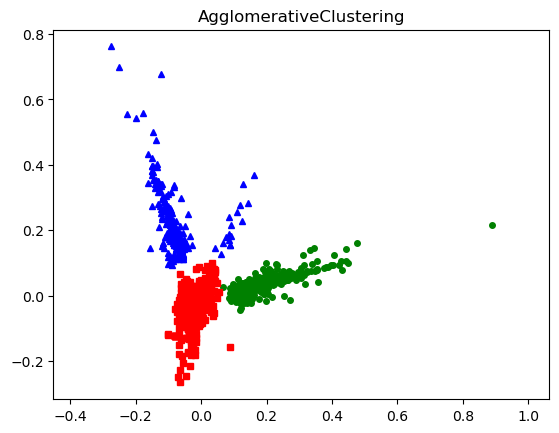

In [24]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)
cluster_display(X, agg.labels_,title='AgglomerativeClustering')

In [19]:
score(X,agg.labels_)

rand: 0.5008582756654285
adjust rand: 0.0018031114506121132
nmi: 0.010721095307144043
ami: 0.010389895349275664
однородность: 0.00927204291237953
полнота: 0.012706963600648241
V-мера: 0.010721095307144043
Silhouette: 0.8223782058936521
Calinski–Harabasz: 8236.435246556874
Davies–Bouldin: 0.429991850932097
